In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try:
    train_df = pd.read_csv("/content/train.csv")
    test_df = pd.read_csv("/content/test.csv")
    print("Data loaded successfully!")
except FileNotFoundError:
    print("Error: One or both of the CSV files were not found.  Please double-check the file paths.")
    exit()

Data loaded successfully!


In [2]:
print("\nFirst 5 rows of train_df:")
print(train_df.head())

print("\nFirst 5 rows of test_df:")
print(test_df.head())

print("\nShape of train_df:")
print(train_df.shape)

print("\nShape of test_df:")
print(test_df.shape)

print("\nNull values in train_df:")
print(train_df.isnull().sum())

print("\nNull values in test_df:")
print(test_df.isnull().sum())

print("\nInformation about train_df:")
print(train_df.info())

print("\nInformation about test_df:")
print(test_df.info())

print("\nDescriptive statistics for train_df:")
print(train_df.describe())

print("\nDescriptive statistics for test_df:")
print(test_df.describe())


First 5 rows of train_df:
   id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  Calories
0   0    male   36   189.0    82.0      26.0       101.0       41.0     150.0
1   1  female   64   163.0    60.0       8.0        85.0       39.7      34.0
2   2  female   51   161.0    64.0       7.0        84.0       39.8      29.0
3   3    male   20   192.0    90.0      25.0       105.0       40.7     140.0
4   4  female   38   166.0    61.0      25.0       102.0       40.6     146.0

First 5 rows of test_df:
       id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5

Shape of train_df:
(45401, 9)

Shape of test_d

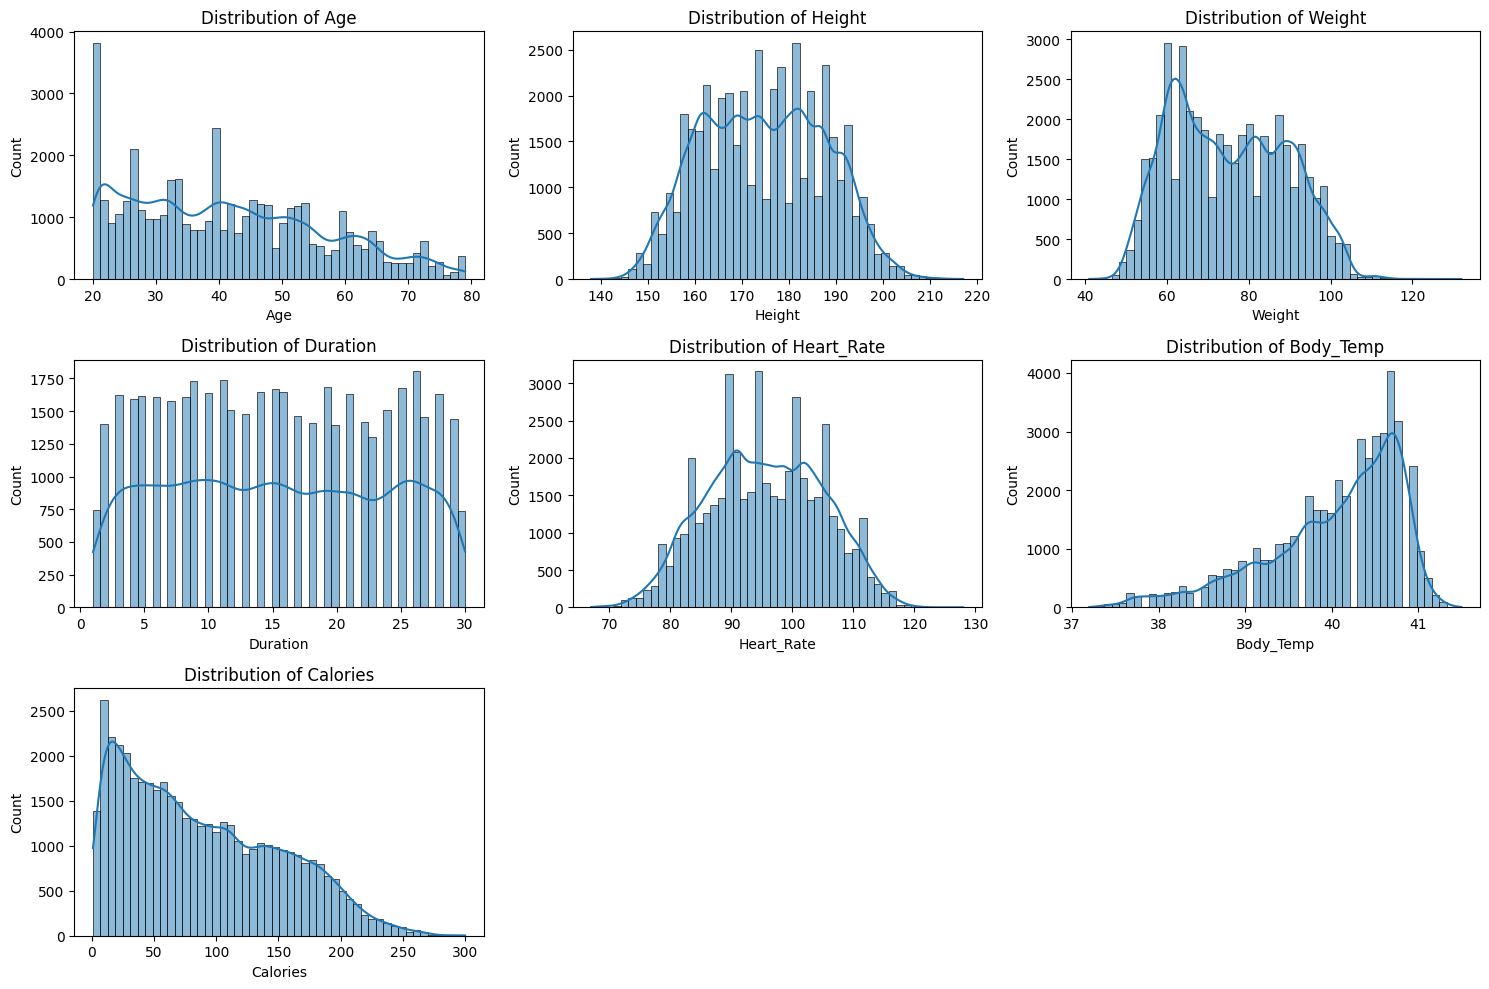

In [3]:
num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']
cat_col = 'Sex'

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(train_df[col], kde=True, bins=50)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

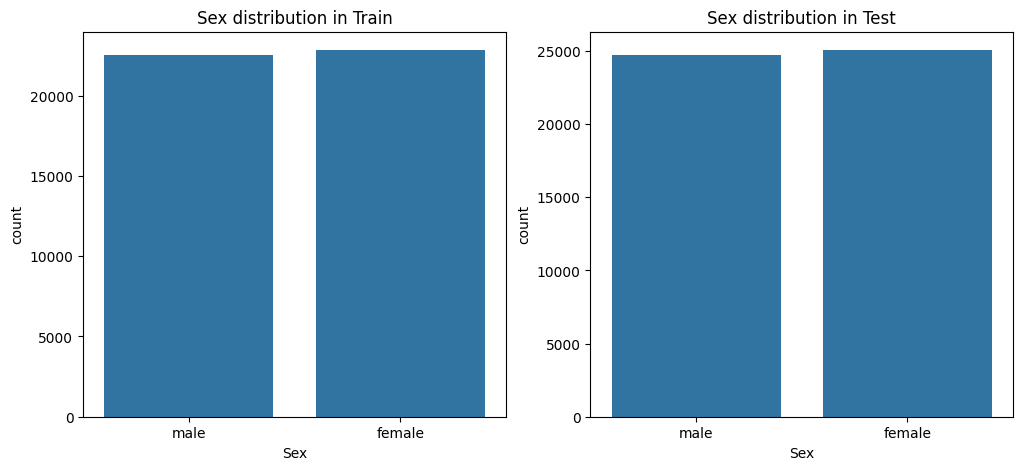

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(x='Sex', data=train_df, ax=ax[0])
ax[0].set_title('Sex distribution in Train')
sns.countplot(x='Sex', data=test_df, ax=ax[1])
ax[1].set_title('Sex distribution in Test')
plt.show()

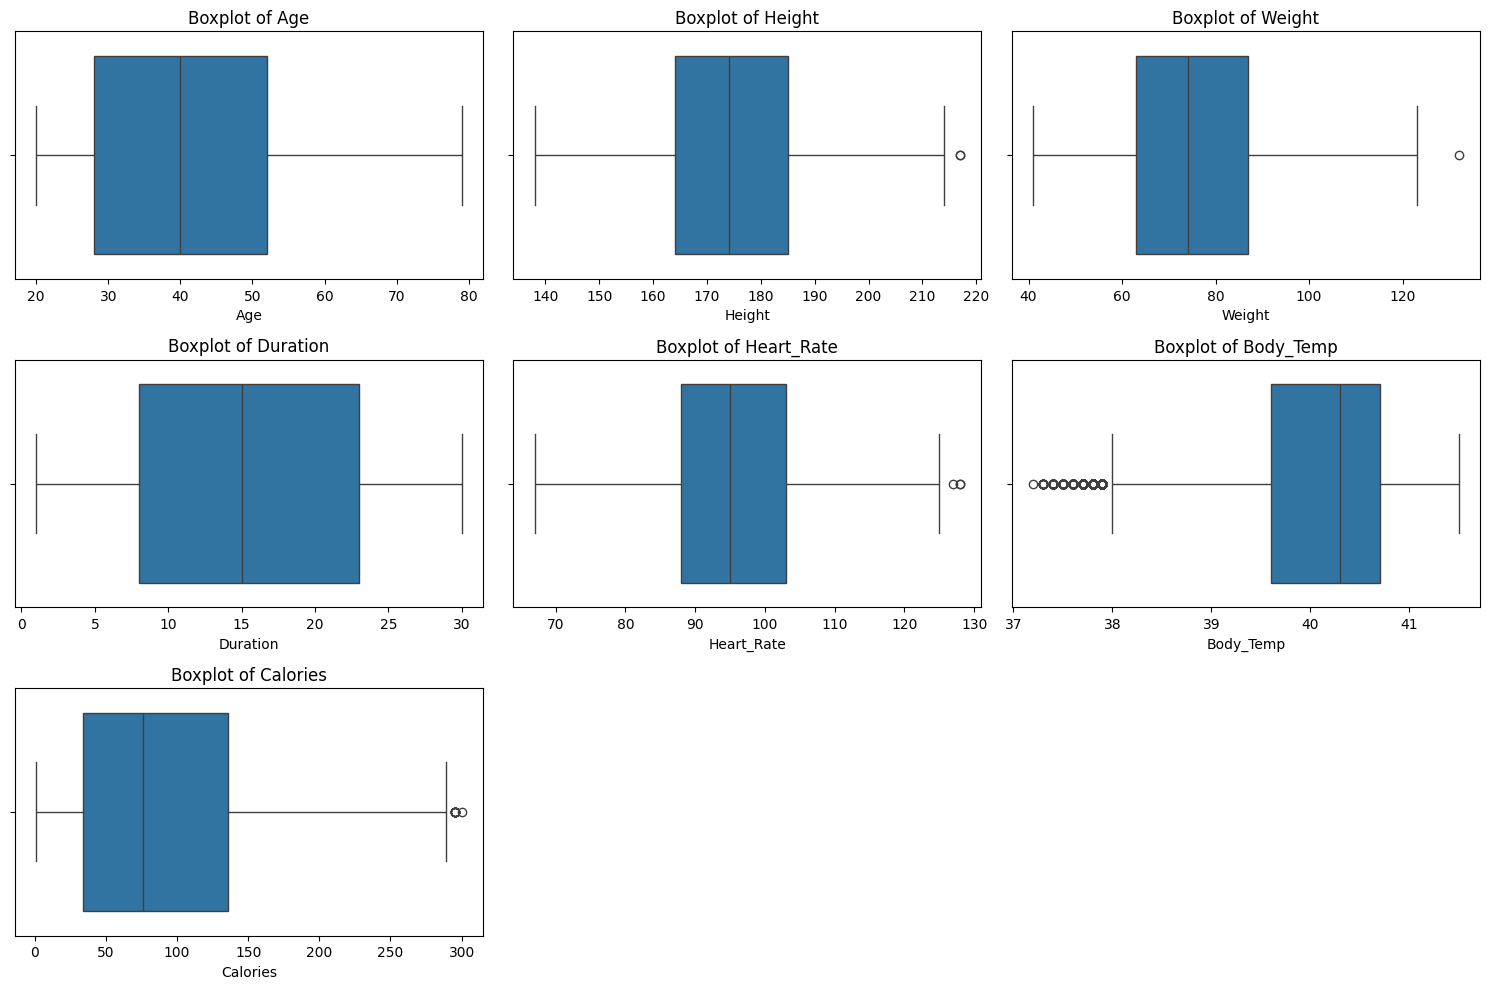

In [5]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [6]:
def count_outliers_iqr(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return len(outliers), lower_bound, upper_bound

print("\nOutlier counts based on IQR method for train_df:")
for col in num_cols:
    count, lb, ub = count_outliers_iqr(train_df[col])
    print(f"{col}: {count}")

print("\nOutlier counts based on IQR method for test_df:")
num_cols_test = [col for col in num_cols if col in test_df.columns]
for col in num_cols_test:
    count, lb, ub = count_outliers_iqr(test_df[col])
    print(f"{col}: {count}")



Outlier counts based on IQR method for train_df:
Age: 0
Height: 2
Weight: 1
Duration: 0
Heart_Rate: 3
Body_Temp: 887
Calories: 11

Outlier counts based on IQR method for test_df:
Age: 0
Height: 3
Weight: 0
Duration: 0
Heart_Rate: 2
Body_Temp: 1233



Correlation Matrix of Train Data:


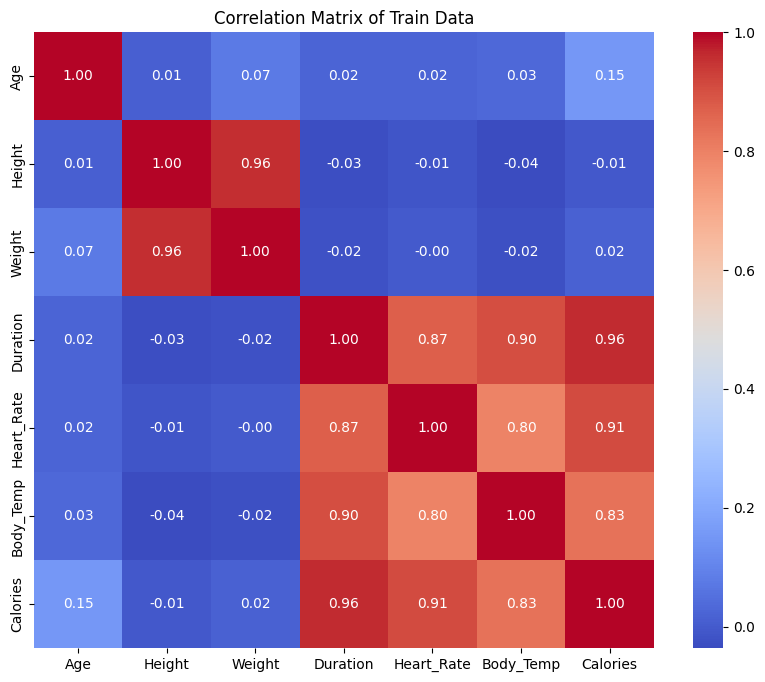

In [7]:
print("\nCorrelation Matrix of Train Data:")
corr = train_df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Train Data')
plt.show()

In [8]:
# Check columns with multicollinearity
print("\nPairs of columns with correlation > 0.9 in train_df:")
print(np.where(corr > 0.9))


Pairs of columns with correlation > 0.9 in train_df:
(array([0, 1, 1, 2, 2, 3, 3, 3, 4, 4, 5, 5, 6, 6, 6]), array([0, 1, 2, 1, 2, 3, 5, 6, 4, 6, 3, 5, 3, 4, 6]))


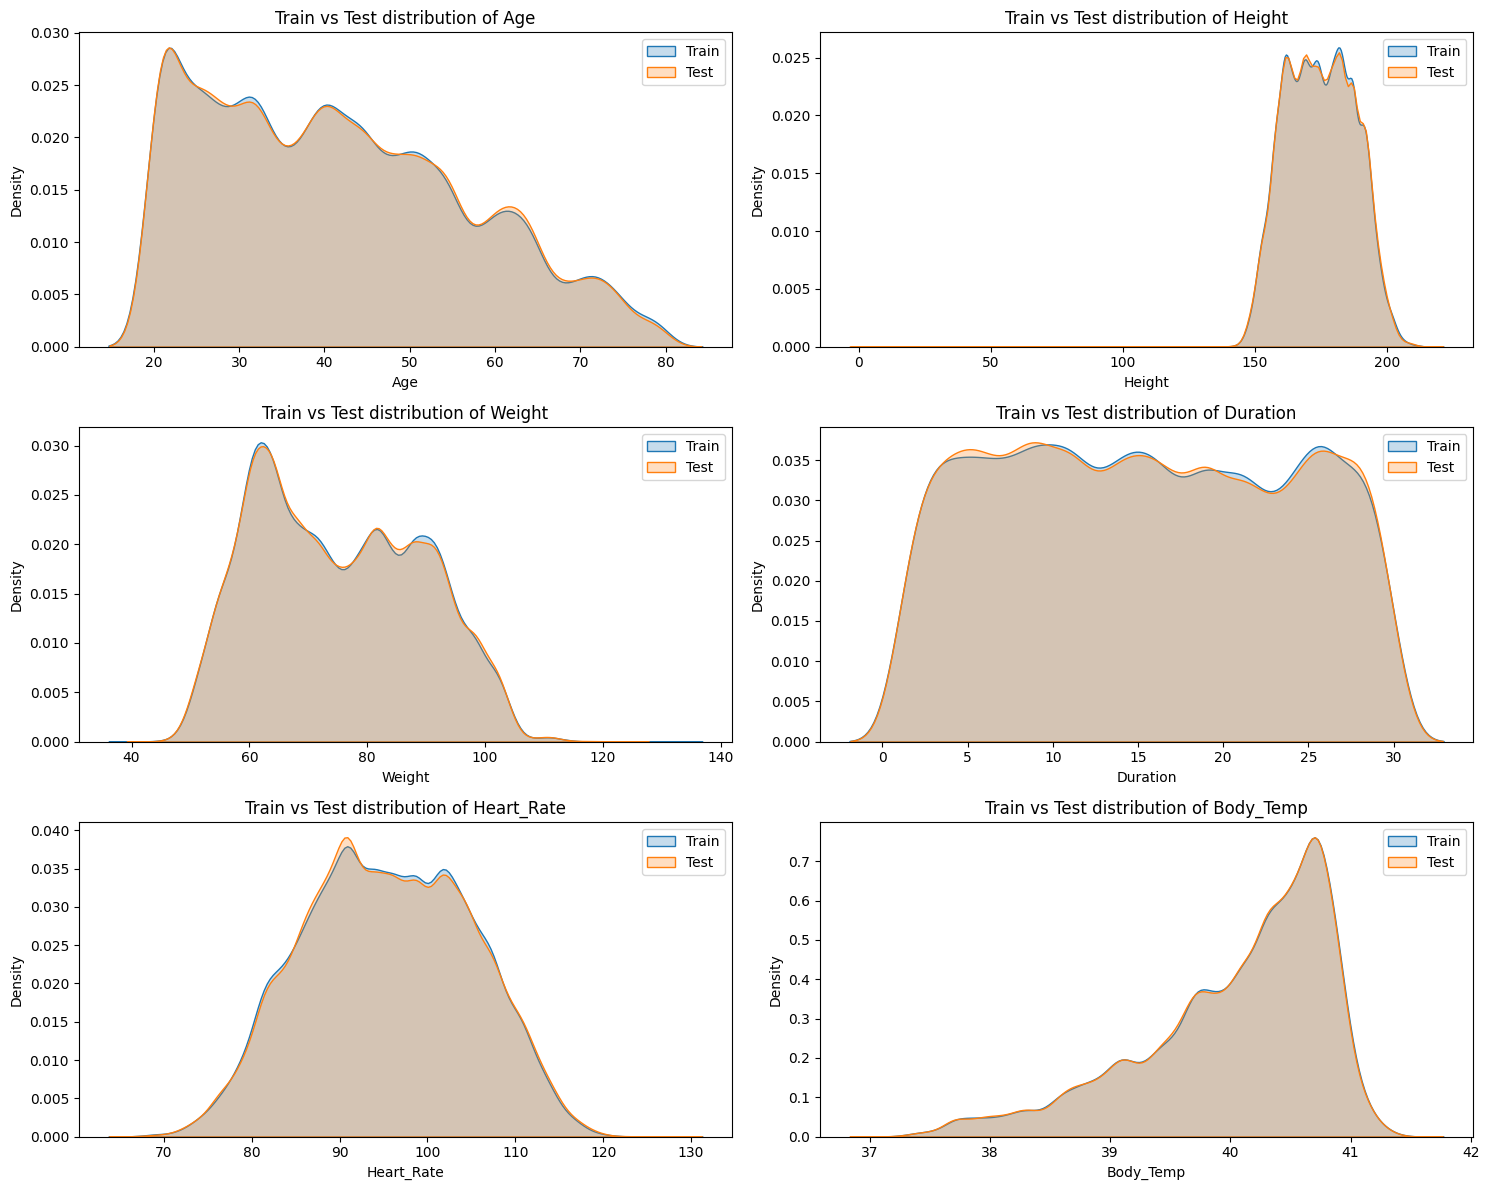

In [9]:
common_num_cols = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp'] # Excluding Calories as it's not in test_df

plt.figure(figsize=(15, 12))
for i, col in enumerate(common_num_cols):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(train_df[col], label='Train', fill=True)
    sns.kdeplot(test_df[col], label='Test', fill=True)
    plt.title(f'Train vs Test distribution of {col}')
    plt.legend()
plt.tight_layout()
plt.show()

In [10]:
print("\nSkewness of numerical columns (train_df):")
existing_num_cols_train = [col for col in num_cols if col in train_df.columns]
print(train_df[existing_num_cols_train].skew())
print("\nKurtosis of numerical columns (train_df):")
print(train_df[existing_num_cols_train].kurtosis())


Skewness of numerical columns (train_df):
Age           0.446981
Height        0.050295
Weight        0.213367
Duration      0.033317
Heart_Rate   -0.014336
Body_Temp    -1.006422
Calories      0.542315
dtype: float64

Kurtosis of numerical columns (train_df):
Age          -0.726012
Height       -0.842090
Weight       -1.000875
Duration     -1.196928
Heart_Rate   -0.674028
Body_Temp     0.487235
Calories     -0.685844
dtype: float64


In [11]:
print("\nCorrelation of numerical features with 'Calories' (train_df):")
if 'Calories' in train_df.columns:
    corr_cols_with_calories = [col for col in num_cols if col in train_df.columns and col != 'Calories']
    if corr_cols_with_calories:
        print(train_df[corr_cols_with_calories].corrwith(train_df['Calories']))
    else:
        print("No other numerical columns found to correlate with 'Calories'.")
else:
    print("'Calories' column not found in train_df to calculate correlations.")


Correlation of numerical features with 'Calories' (train_df):
Age           0.150768
Height       -0.005090
Weight        0.015311
Duration      0.959960
Heart_Rate    0.907643
Body_Temp     0.830084
dtype: float64


In [12]:
print("\nUnique values and counts for 'Sex' in train_df:")
if 'Sex' in train_df.columns:
    print(train_df['Sex'].value_counts())
    print(f"Cardinality of 'Sex' in train_df: {train_df['Sex'].nunique()}")
else:
    print("'Sex' column not found in train_df.")

print("\nUnique values and counts for 'Sex' in test_df:")
if 'Sex' in test_df.columns:
    print(test_df['Sex'].value_counts())
    print(f"Cardinality of 'Sex' in test_df: {test_df['Sex'].nunique()}")
else:
    print("'Sex' column not found in test_df.")


Unique values and counts for 'Sex' in train_df:
Sex
female    22849
male      22552
Name: count, dtype: int64
Cardinality of 'Sex' in train_df: 2

Unique values and counts for 'Sex' in test_df:
Sex
female    25064
male      24752
Name: count, dtype: int64
Cardinality of 'Sex' in test_df: 2


In [13]:
print("\nChecking for non-positive 'Calories' values in train_df:")
if 'Calories' in train_df.columns:
    non_positive_calories_train = train_df[train_df['Calories'] <= 0]
    if not non_positive_calories_train.empty:
        print(f"Found {len(non_positive_calories_train)} rows with non-positive 'Calories'.")
        print(non_positive_calories_train[['Calories']].head()) # Display first few non-positive values
    else:
        print("No non-positive 'Calories' values found in train_df.")
else:
    print("'Calories' column not found in train_df.")


Checking for non-positive 'Calories' values in train_df:
No non-positive 'Calories' values found in train_df.


In [21]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.6 MB/s eta 0:00:00


In [38]:
import lightgbm as lgb
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_log_error

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

def preprocess_lightgbm(df):
    df_copy = df.copy()
    df_copy['Sex'] = df_copy['Sex'].map({'male': 0, 'female': 1})

    # Winsorize Body_Temp to remove extreme low outliers (1st and 99th percentile)
    lower_bound = df_copy['Body_Temp'].quantile(0.01)
    upper_bound = df_copy['Body_Temp'].quantile(0.99)
    df_copy['Body_Temp'] = df_copy['Body_Temp'].clip(lower=lower_bound, upper=upper_bound)

    return df_copy

train_processed = preprocess_lightgbm(train_df)
X = train_processed.drop(['id', 'Calories'], axis=1)
y = train_processed['Calories']

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

categorical_features = ['Sex']

# Model
lgbm_model = LGBMRegressor(random_state=42, n_estimators=1000, learning_rate=0.05)
lgbm_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    categorical_feature=categorical_features,
    callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=True)] # verbose=True added to see stopping messages
)

# Predict on validation
y_pred = lgbm_model.predict(X_val)
y_pred = np.maximum(y_pred, 0)  # ensure no negative predictions

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)
rmsle = np.sqrt(mean_squared_log_error(y_val, y_pred))

print(f"LightGBM Model Evaluation Metrics:")
print(f"RMSE  : {rmse:.4f}")
print(f"MAE   : {mae:.4f}")
print(f"R²    : {r2:.4f}")
print(f"RMSLE : {rmsle:.4f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045403 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 351
[LightGBM] [Info] Number of data points in the train set: 600000, number of used features: 7
[LightGBM] [Info] Start training from score 88.298465
Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[988]	valid_0's l2: 12.987
LightGBM Model Evaluation Metrics:
RMSE  : 3.6037
MAE   : 2.1762
R²    : 0.9966
RMSLE : 0.0620


In [40]:
from catboost import CatBoostRegressor
from sklearn.preprocessing import StandardScaler

train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Preprocessing
def preprocess(df):
    df = df.copy()
    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    df.reset_index(drop=True, inplace=True)
    return df

train_cleaned = preprocess(train_df)

X = train_cleaned.drop(columns=['id', 'Calories'])
y = train_cleaned['Calories']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
numeric_features = X.select_dtypes(include=np.number).columns.tolist()

X_train_scaled = X_train.copy()
X_train_scaled[numeric_features] = scaler.fit_transform(X_train[numeric_features])

X_val_scaled = X_val.copy()
X_val_scaled[numeric_features] = scaler.transform(X_val[numeric_features])

# Model
model = CatBoostRegressor(random_state=42, verbose=0)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_val_scaled)

rmse = np.sqrt(mean_squared_error(y_val, y_pred))
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# RMSLE: Use log1p to avoid log(0)
def rmsle(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.log1p(y_true), np.log1p(np.maximum(y_pred, 0))))

rmsle_score = rmsle(y_val, y_pred)

print("Model Evaluation Metrics:")
print(f"RMSE  : {rmse:.4f}")
print(f"MAE   : {mae:.4f}")
print(f"R²    : {r2:.4f}")
print(f"RMSLE : {rmsle_score:.4f}")


Model Evaluation Metrics:
RMSE  : 3.5561
MAE   : 2.1225
R²    : 0.9967
RMSLE : 0.0614


In [41]:
test_cleaned = preprocess(test_df)
test_ids = test_cleaned['id']

test_scaled = test_cleaned.copy()
test_scaled[numeric_features] = scaler.transform(test_cleaned[numeric_features])
test_predictions = model.predict(test_scaled.drop(columns=['id']))

submission = pd.DataFrame({
    'id': test_ids,
    'Calories': test_predictions
})

submission.to_csv("submission.csv", index=False)
print("submission.csv has been saved.")


submission.csv has been saved.


In [42]:
print("test file")
print(test_df.head(8))
print("submission file")
print(submission.head(8))

test file
       id     Sex  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  750000    male   45   177.0    81.0       7.0        87.0       39.8
1  750001    male   26   200.0    97.0      20.0       101.0       40.5
2  750002  female   29   188.0    85.0      16.0       102.0       40.4
3  750003  female   39   172.0    73.0      20.0       107.0       40.6
4  750004  female   30   173.0    67.0      16.0        94.0       40.5
5  750005  female   43   169.0    65.0       6.0        81.0       39.4
6  750006    male   74   189.0    97.0       9.0        86.0       40.0
7  750007    male   60   186.0    90.0       2.0        79.0       38.1
submission file
       id    Calories
0  750000   26.756692
1  750001  107.894284
2  750002   86.783485
3  750003  125.550139
4  750004   76.167599
5  750005   21.875885
6  750006   48.632195
7  750007    6.824353
